# Miller Building a Classifier
**Author:** Dan Miller

**Date:** November 5th, 2025

**Objective:** Build and evaluate three classifiers using the Titanic dataset, then compare their performance across different feature sets in terms of predicting survival

## Introduction
This project explores the difference in performance between three classifiers: Decision Tree, Support Vector Machine, and Neural Network.  These classifiers will be made on the Titanic dataset to predict the feature 'survived'.  First, the data will be explored and there will be feature engineering done.  After that, each classifier will be made individually on three separate feature sets.  After all three classifiers are made and compared, there will be a summary at the end to discuss the findings.

## Section 1. Import and Inspect the Data

### 1.1 Import the necessary libraries

In [1]:
# Imports

import warnings

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree


### 1.2 Load the dataset and display a few records

In [2]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

The titanic dataset was already thoroughly explored in ml02_miller.ipynb, so we already know what needs to be done to the data.

In [3]:
# Impute missing values for age using the median

median_age = titanic["age"].median()
titanic["age"] = titanic["age"].fillna(median_age)

In [4]:
# Fill in missing embark_town values using the mode

mode_embark = titanic["embark_town"].mode()[0]
titanic["embark_town"] = titanic["embark_town"].fillna(mode_embark)

### 2.2 Feature Engineering

In [5]:
# Create new feature: family_size
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# Map categories to numeric values

titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})
titanic["embarked"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})

# Convert 'alone' to numeric binary
titanic["alone"] = titanic["alone"].astype(int)

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

While 'survived' will always be the target, there will be three different input cases:

Case 1:
- input feature: alone
- target: survived

Case 2:
- input features: age
- target: survived

Case 3:
- input features: age, family_size
- target: survived

### 3.2 Define X and y

In [6]:
# Case 1: Feature = alone

X1 = titanic[["alone"]]

y1 = titanic["survived"]

In [7]:
# Case 2: Feature = age (drop if na or not available)

X2 = titanic[["age"]].dropna()

y2 = titanic.loc[X2.index, "survived"]

In [8]:
# Case 3: Features = age & family_size (drop if na or not available)

X3 = titanic[["age", "family_size"]].dropna()

y3 = titanic.loc[X3.index, "survived"]

### Reflection 3:

1) Why are these features selected? **All of these features are somewhat related to each other, age, being alone, and the size of your family can all have feature interaction.  These relationships can give our future ML models signals for separating survivors from non-survivors.  For instance, a child that isn't alone most likely has a better chance of survival than an adult who is alone.**

2) Are there features that are likely to be highly predictive of survival? **Of the features we chose, age might have the highest chance of being highly predictive of survival, as children had a much higher survival chance.**

## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data

In [9]:
# Case 1: Feature = alone

splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_idx1], X1.iloc[test_idx1]
    y1_train, y1_test = y1.iloc[train_idx1], y1.iloc[test_idx1]

print("Case 1 - Alone:")
print("Train size:", len(X1_train), "| Test size:", len(X1_test))

Case 1 - Alone:
Train size: 712 | Test size: 179


In [10]:
# Case 2: Feature = age

splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train, X2_test = X2.iloc[train_idx2], X2.iloc[test_idx2]
    y2_train, y2_test = y2.iloc[train_idx2], y2.iloc[test_idx2]

print("Case 2 - Age:")
print("Train size:", len(X2_train), "| Test size:", len(X2_test))

Case 2 - Age:
Train size: 712 | Test size: 179


In [11]:
# Case 3: Features = age & family_size

splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train, X3_test = X3.iloc[train_idx3], X3.iloc[test_idx3]
    y3_train, y3_test = y3.iloc[train_idx3], y3.iloc[test_idx3]

print("Case 3 - Age & Family Size:")
print("Train size:", len(X3_train), "| Test size:", len(X3_test))

Case 3 - Age & Family Size:
Train size: 712 | Test size: 179


### 4.2 Create and Train Model (Decision Tree)

In [12]:
# Case 1: Decision Tree using alone

tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
# Case 2: Decision Tree using age

tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
# Case 3: Decision Tree using age & family_size

tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Predict and Evaluate Model Performance

In [15]:
# Case 1
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [16]:
# Case 2
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [17]:
# Case 3
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age & family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age & family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - age & family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3 - age & family_size):
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



### 4.4 Report Confusion Matrix (as a heatmap)

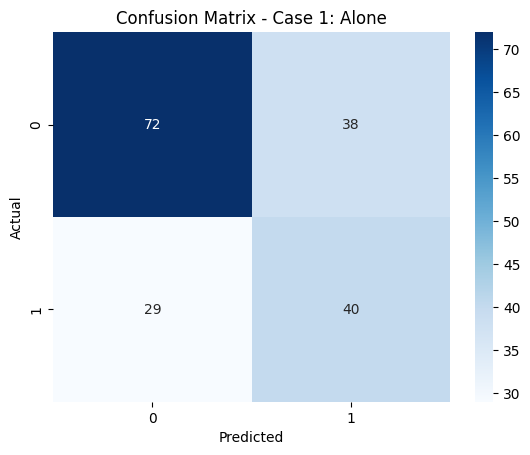

In [18]:
# Create a confusion matrix for test predictions of Case 1
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm1, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 1: Alone")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

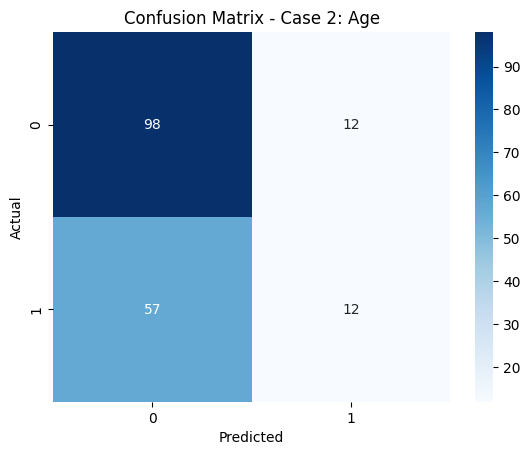

In [19]:
# Create a confusion matrix for test predictions of Case 2
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm2, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 2: Age")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

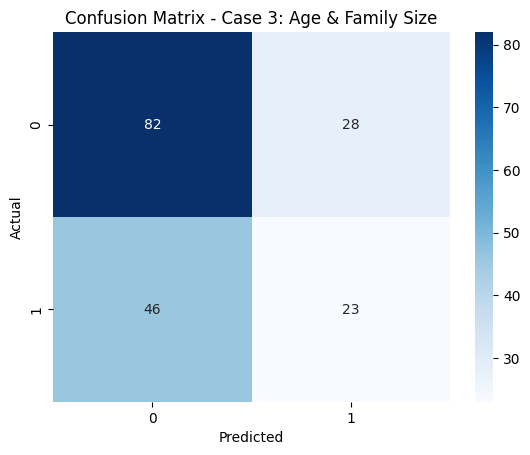

In [20]:
# Create a confusion matrix for test predictions of Case 3
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm3, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Case 3: Age & Family Size")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 4.5 Report Decision Tree Plot

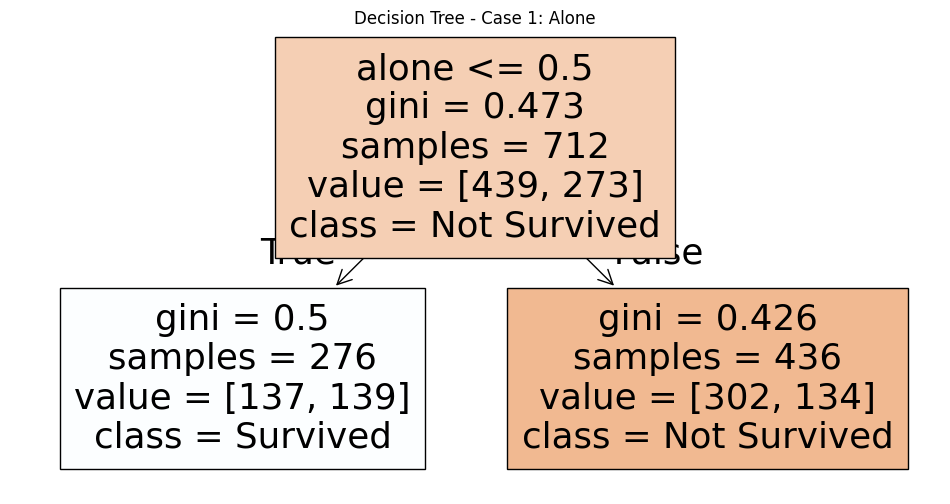

In [21]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1, feature_names=X1.columns, class_names=["Not Survived", "Survived"], filled=True) # type: ignore
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save the figure
fig.savefig("tree_case1_alone.png")

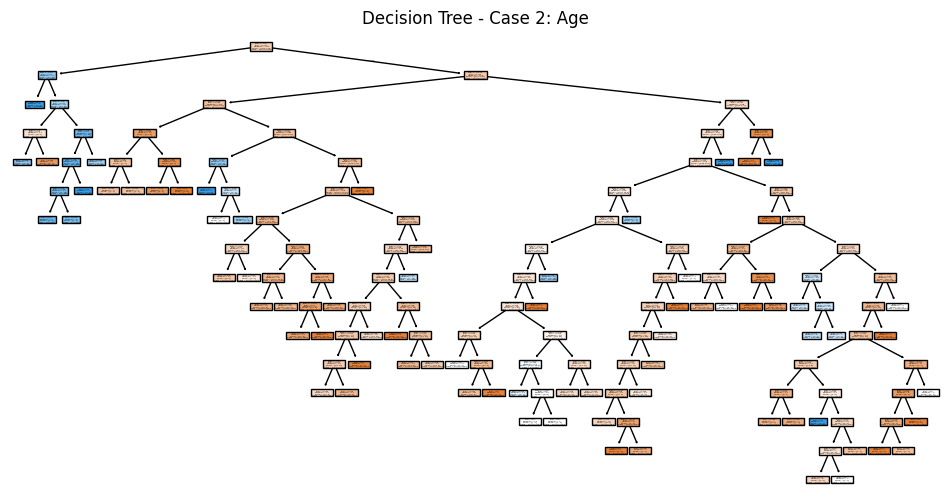

In [22]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2, feature_names=X2.columns, class_names=["Not Survived", "Survived"], filled=True) # type: ignore
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save the figure
fig.savefig("tree_case2_age.png")

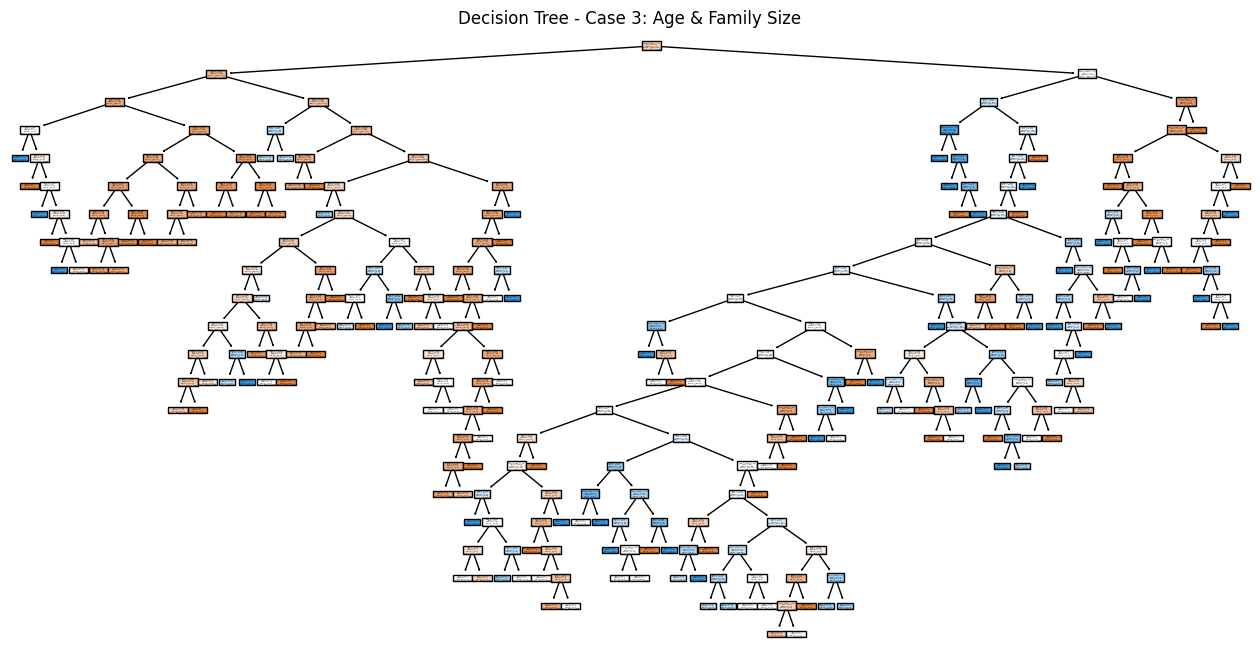

In [23]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3, feature_names=X3.columns, class_names=["Not Survived", "Survived"], filled=True) # type: ignore
plt.title("Decision Tree - Case 3: Age & Family Size")
plt.show()

# Save the figure
fig.savefig("tree_case3_age_family.png")

### Reflection 4:

1) How well did the different cases perform?  **The accuracies are as follows:**
 - Case 1: 112/179 = **62.57%**
 - Case 2: 110/179 = **61.45%**
 - Case 3: 106/179 = **59.22%**

2) Are there any surprising results?  **I was surprised that Case 1 had the highest accuracy, as I was sure Case 3 would perform the best because it had two inputs.**

3) Which inputs worked better?  **It turns out that alone was the best predictor, although it only performed ever so slightly better than age.  If we go by the F1 Score, alone is still the best, but age & family size beats just age.**

## Section 5. Compare Alternative Models (SVC, NN)

### 5.1 Train and Evaluate Model (SVC)

In [24]:
# Case 1: SVC using "alone"

svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)

print("Results for SVC on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [25]:
# Case 2: SVC using "age"

svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)

print("Results for SVC on test data (Case 2 - age):")
print(classification_report(y2_test, y2_svc_pred))

Results for SVC on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [26]:
# Case 3: SVC using "age" and "family_size"

svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)

print("Results for SVC on test data (Case 3 - age and family_size):")
print(classification_report(y3_test, y3_svc_pred))

Results for SVC on test data (Case 3 - age and family_size):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### 5.2 Visualize Support Vectors

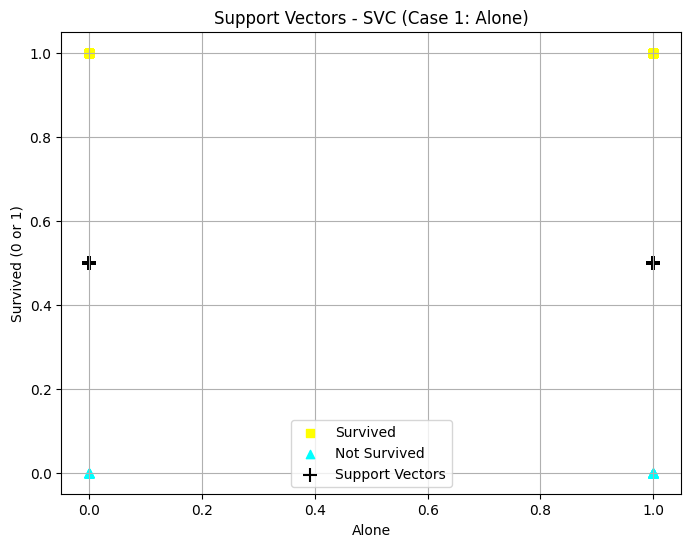

In [27]:
# Visualize support vectors for Case 1

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, "alone"]
not_survived_alone = X1_test.loc[y1_test == 0, "alone"]

# Create scatter plot for survived and not survived
plt.figure(figsize=(8,6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c="yellow", marker="s", label="Survived")
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c="cyan", marker="^", label="Not Survived")

# Overlay support vectors
# Check if the model has support_vectors_
if hasattr(svc_model1, "support_vectors_"):
    # Get the X values of the support vectors
    support_x = svc_model1.support_vectors_[:, 0]
    # Plot them using a fixed Y value
    plt.scatter(support_x, [0.5] * len(support_x), c="black", marker="+", s=100,label="Support Vectors")

# Add labels and legend
plt.xlabel("Alone")
plt.ylabel("Survived (0 or 1)")
plt.title("Support Vectors - SVC (Case 1: Alone)")
plt.legend()
plt.grid(True)
plt.show()

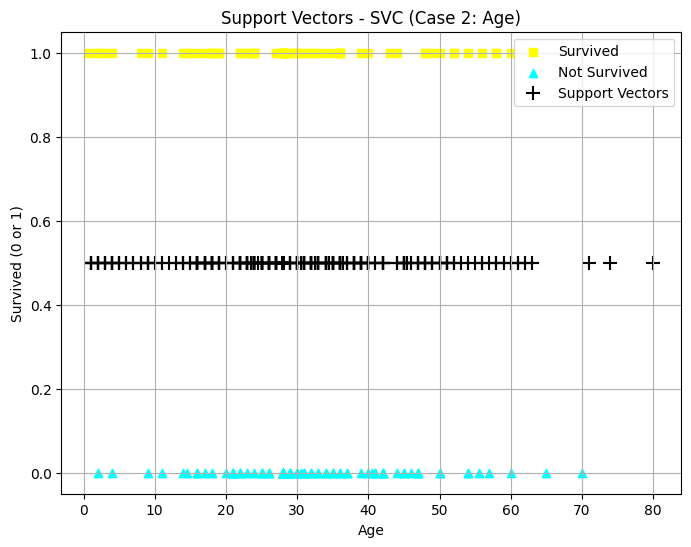

In [28]:
# Visualize support vectors for Case 2

# Create groups based on survival
survived = X2_test.loc[y2_test == 1, "age"]
not_survived = X2_test.loc[y2_test == 0, "age"]

# Create scatter plot for survived and not survived
plt.figure(figsize=(8,6))

plt.scatter(survived, y2_test.loc[y2_test == 1], c="yellow", marker="s", label="Survived")
plt.scatter(not_survived, y2_test.loc[y2_test == 0], c="cyan", marker="^", label="Not Survived")

# Overlay support vectors
# Check if the model has support_vectors_
if hasattr(svc_model2, "support_vectors_"):
    # Get the X values of the support vectors
    support_x = svc_model2.support_vectors_[:, 0]
    # Plot them using a fixed Y value
    plt.scatter(support_x, [0.5] * len(support_x), c="black", marker="+", s=100, label="Support Vectors")

# Add labels and legend
plt.xlabel("Age")
plt.ylabel("Survived (0 or 1)")
plt.title("Support Vectors - SVC (Case 2: Age)")
plt.legend()
plt.grid(True)
plt.show()

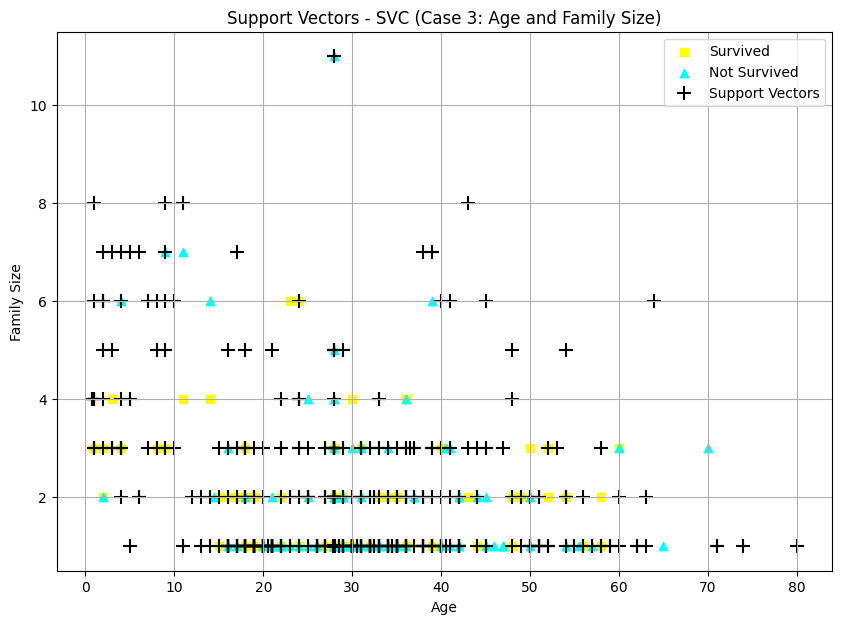

In [29]:
# Visualize support vectors for Case 3

# Create groups based on survival
survived3 = X3_test[y3_test == 1]
not_survived3 = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10,7))

# Plot survived
plt.scatter(survived3["age"], survived3["family_size"], c="yellow", marker="s", label="Survived")

# Plot not survived
plt.scatter(not_survived3["age"], not_survived3["family_size"], c="cyan", marker="^", label="Not Survived")

# Overlay support vectors
if hasattr(svc_model3, "support_vectors_"):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c="black", marker="+", s=100, label="Support Vectors")

# Add labels and legend
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Support Vectors - SVC (Case 3: Age and Family Size)")
plt.legend()
plt.grid(True)
plt.show()

### 5.3 Train and Evaluate Model (Neural Network on Case 3)

In [30]:
# Create and Train NN for Case 3 (age & family_size)

nn_model3 = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver="lbfgs", max_iter=1000, random_state=42)

nn_model3.fit(X3_train, y3_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [31]:
# Predict on test data (Case 3)

y3_nn_pred = nn_model3.predict(X3_test)

# Print report
print("Results for Neural Network on test data (Case 3 - age & family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age & family_size):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       110
           1       0.57      0.46      0.51        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.63       179
weighted avg       0.65      0.66      0.65       179



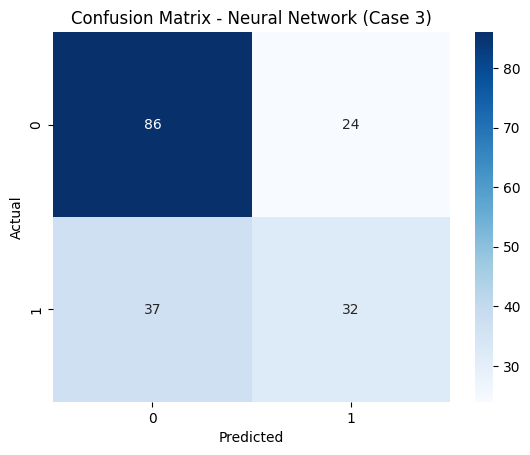

In [32]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Neural Network (Case 3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 5.4 Visualize (Neural Network on Case 3)

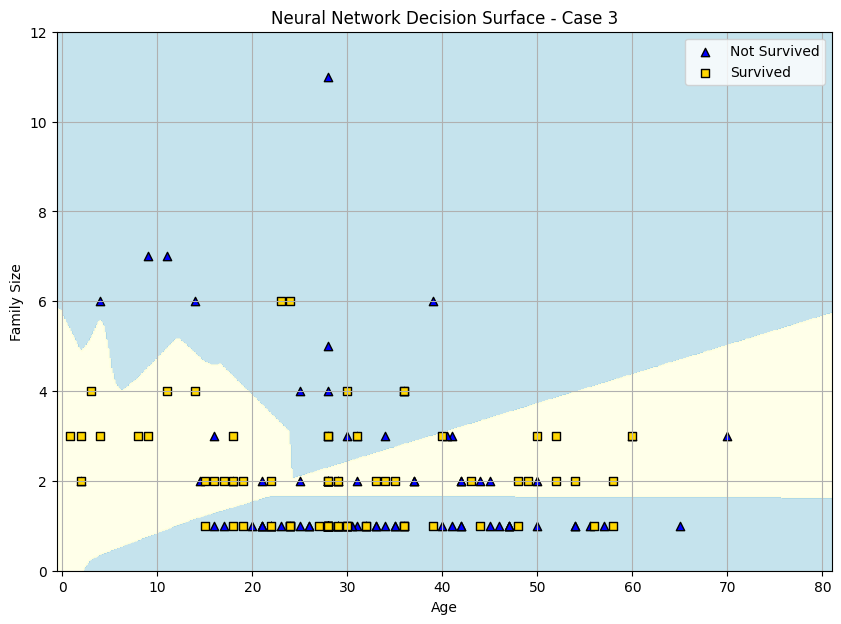

In [33]:
warnings.filterwarnings("ignore", category=UserWarning)
# Get the range of oour two features
padding = 1
x_min, x_max = X3["age"].min()-padding,X3["age"].max()+padding
y_min, y_max = X3["family_size"].min()-padding, X3["family_size"].max()+padding

# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten the grid arrays and prepare them for prediction
Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results
Z = Z.reshape(xx.shape)

# Plot the decision surface showing predicted survival zones
# Blue for 0, yellow for 1
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(["lightblue", "lightyellow"])
plt.contourf(xx,yy,Z, cmap=cmap_background, alpha=0.7)

# Overlay the actual test data points

# Plot the passengers who didn't survive 
plt.scatter(X3_test["age"][y3_test==0], X3_test["family_size"][y3_test==0], c="blue", marker="^", edgecolor="k", label="Not Survived")

# Plot the passengers who survived
plt.scatter(X3_test["age"][y3_test==1], X3_test["family_size"][y3_test==1], c="gold", marker="s", edgecolor="k", label="Survived")

# Add labels and legend
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Neural Network Decision Surface - Case 3")
plt.legend()
plt.grid(True)
plt.show()


### Reflection 5:

1) How well did each of these new models/cases perform?  **SVC performed slightly better than the decision trees, but not by much.  NN performed the best of all.**

2) Are there any surprising results or insights?  **I found it surprising that all three cases of Support Vectors yielded the same accuracy: 63%.  The visual support vectors for Case 3 shows a lot more support vectors than I thought there would be.**

3) Why might one model outperform the others?  **It depends on the data, for instance if datapoints are linearly separable, then the support vectors are going to perform extremely well.  Another example would be that decision trees perform best with structured, tabular data insted of unstructured data like images.**

## Section 6. Final Thoughts & Insights

### 1. Summarize Findings

| Model                | Precision | Recall | F1-Score | Accuracy |
| :------------------: | :-------- | :----- | :------- | :------- |
| Decision Tree Case 1 | 0.51      | 0.58   | 0.54     | 0.63     |
| Decision Tree Case 2 | 0.50      | 0.17   | 0.26     | 0.61     |
| Decision Tree Case 3 | 0.46      | 0.35   | 0.40     | 0.59     |
| SVC Case 1           | 0.51      | 0.58   | 0.54     | 0.63     |
| SVC Case 2           | 0.71      | 0.07   | 0.13     | 0.63     |
| SVC Case 3           | 0.71      | 0.07   | 0.13     | 0.63     |
| NN Case 3            | 0.57      | 0.46   | 0.51     | 0.66     |

It's clear from the summary table that the Neural Network was the model that performed the best.  Although Decision Tree Case 1 had a higher recall and f1-score, Neural Network's higher precision and accuracy mean more to me.  Cases 2 and 3 of the SVC models performed very similarly to each other.  Case 1's data had a higher recall and f1-score with a lower Precision.  When looking at all three Decision Trees, we get pretty different results for all three.  Regurgitating what was said previously, Case 1 of the Decision Trees performed the best.

### 2. Discuss Challenges Faced

The greatest challenge I had while creating this notebook was understanding the Classification Reports and Confusion Matrices simply because I don't have much experience with them.  I wasn't sure which value for precison, recall, etc. I was supposed to be looking at.  Originally I went with the weighted average, but went back and changed it to the row labeld '1' because I figured that all these models are about predicting survival.

### 3. Next Steps 

To go further with this dataset, I would want to create models that take more than just one or two inputs, because of all the models we created, the highest accuracy was only 66%, which isn't bad but it definitely could be better.  I would most likely use features like sex and class when creating those new models.  

Furthering my exploration of classification models, I would want to try creating models on a differently structured dataset, for instance a dataset of images rather than a table.  It would also be nice to try different kinds of classification models like K-Nearest Neighbors.